In [1]:
%pwd

'C:\\Users\\Austin.Fligor\\Desktop\\MBAN\\Financial Sentiment Analysis'

In [11]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
#Load the dataset
data = pd.read_csv("C:\\Users\\Austin.Fligor\\Desktop\\MBAN\\Financial Sentiment Analysis\\Financial_sent_data.csv")

In [4]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [6]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [7]:
data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

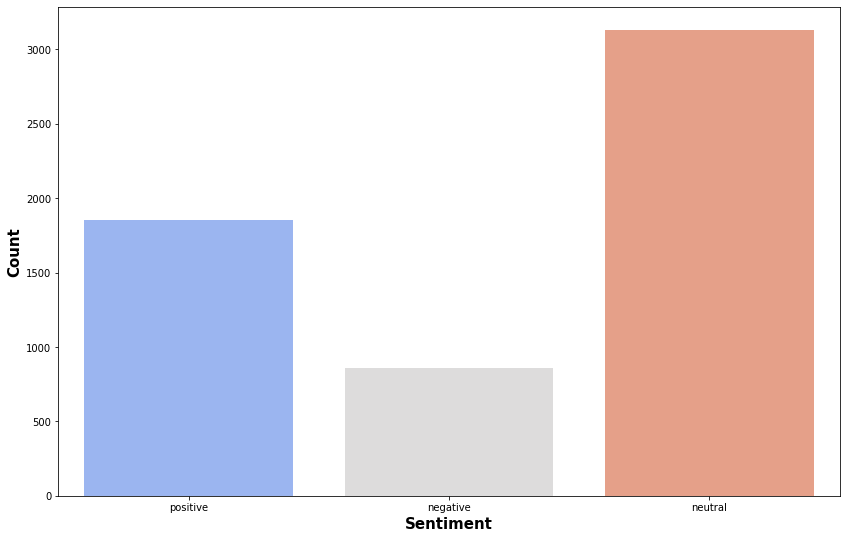

In [8]:
plt.figure(figsize=(14,9))
sns.countplot(x = 'Sentiment',data=data,palette ='coolwarm')
plt.xlabel("Sentiment",fontweight='bold',size=15)
plt.ylabel("Count",fontweight='bold',size=15)
plt.show()

In [9]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Sentiment")
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0
2,"For the last quarter of 2010 , Componenta 's n...",2
3,According to the Finnish-Russian Chamber of Co...,1
4,The Swedish buyout firm has sold its remaining...,1
...,...,...
5837,RISING costs have forced packaging producer Hu...,0
5838,Nordic Walking was first used as a summer trai...,1
5839,"According shipping company Viking Line , the E...",1
5840,"In the building and home improvement trade , s...",1


In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['Sentence'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Austin.Fligor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
corpus[0:5]

['geosolut technolog leverag benefon gp solut provid locat base search technolog commun platform locat relev multimedia content new power commerci model',
 'esi low bk real possibl',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'accord finnish russian chamber commerc major construct compani finland oper russia',
 'swedish buyout firm sold remain percent stake almost eighteen month take compani public finland']

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[142  25  25]
 [289 211 143]
 [169  27 138]]


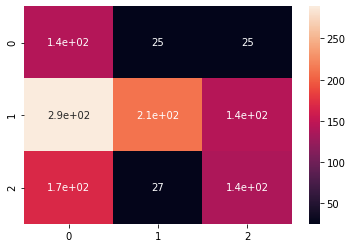

In [22]:
sns.heatmap(cm,annot =True)
plt.show()

In [23]:
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy of Naive Bayes (Using Bag of words technique): {acc1}")

Accuracy of Naive Bayes (Using Bag of words technique): 0.42001710863986313


In [24]:
#Now we try TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [25]:
y=data['Sentiment']

In [26]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(4381, 5000)
(1461, 5000)
(4381,)
(1461,)


In [29]:
count_df = pd.DataFrame(X1_train, columns=tfidf_v.get_feature_names())
count_df

,aapl,aapl http,aapl http co,ab,ab inbev,ab sto,abb,abl,abp,abp hel,...,yhoo,yhtyma,yhtyma oyj,yhtyma oyj hel,yit,yit corpor,york,zinc,znga,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X1_train, y1_train)
GaussianNB()
y1_pred = classifier.predict(X1_test)

In [31]:
acc2 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy of Naive Bayes (Using TF - IDF technique): {acc2}")

Accuracy of Naive Bayes (Using TF - IDF technique): 0.5400410677618069


In [32]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X1_train, y1_train)
pred = classifier.predict(X1_test)
pred = classifier.predict(X1_test)
score = accuracy_score(y1_test, pred)

In [33]:
score

0.6721423682409309

In [35]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\Austin.Fligor\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 30 130  32]
 [ 51 550  42]
 [ 10 110 214]]


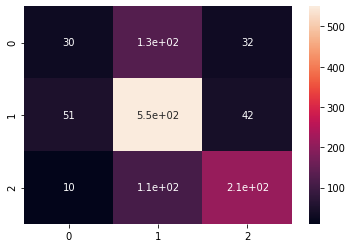

In [37]:
sns.heatmap(cm,annot=True)
plt.show()

In [38]:
acc3 = accuracy_score(y_test, y_pred)
print(acc3)

0.679213002566296


In [40]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.0856
0:	learn: 1.0744115	total: 65.4ms	remaining: 1m 5s
1:	learn: 1.0542612	total: 73ms	remaining: 36.4s
2:	learn: 1.0334723	total: 80.7ms	remaining: 26.8s
3:	learn: 1.0197677	total: 88.1ms	remaining: 21.9s
4:	learn: 1.0055921	total: 95.4ms	remaining: 19s
5:	learn: 0.9939193	total: 103ms	remaining: 17.1s
6:	learn: 0.9835225	total: 111ms	remaining: 15.7s
7:	learn: 0.9734878	total: 119ms	remaining: 14.7s
8:	learn: 0.9654381	total: 126ms	remaining: 13.9s
9:	learn: 0.9573342	total: 134ms	remaining: 13.3s
10:	learn: 0.9512071	total: 142ms	remaining: 12.8s
11:	learn: 0.9457943	total: 150ms	remaining: 12.4s
12:	learn: 0.9388886	total: 159ms	remaining: 12.1s
13:	learn: 0.9343741	total: 167ms	remaining: 11.8s
14:	learn: 0.9314254	total: 175ms	remaining: 11.5s
15:	learn: 0.9256993	total: 184ms	remaining: 11.3s
16:	learn: 0.9215086	total: 194ms	remaining: 11.2s
17:	learn: 0.9178308	total: 203ms	remaining: 11.1s
18:	learn: 0.9141908	total: 212ms	remaining: 10.9s
19:	learn: 0

165:	learn: 0.7316483	total: 1.5s	remaining: 7.55s
166:	learn: 0.7307681	total: 1.51s	remaining: 7.54s
167:	learn: 0.7301171	total: 1.52s	remaining: 7.54s
168:	learn: 0.7295027	total: 1.53s	remaining: 7.53s
169:	learn: 0.7287176	total: 1.54s	remaining: 7.52s
170:	learn: 0.7276224	total: 1.55s	remaining: 7.51s
171:	learn: 0.7268852	total: 1.56s	remaining: 7.51s
172:	learn: 0.7262469	total: 1.57s	remaining: 7.5s
173:	learn: 0.7255178	total: 1.58s	remaining: 7.49s
174:	learn: 0.7250726	total: 1.58s	remaining: 7.47s
175:	learn: 0.7245894	total: 1.59s	remaining: 7.46s
176:	learn: 0.7241033	total: 1.6s	remaining: 7.44s
177:	learn: 0.7235160	total: 1.61s	remaining: 7.43s
178:	learn: 0.7229350	total: 1.62s	remaining: 7.41s
179:	learn: 0.7221385	total: 1.62s	remaining: 7.4s
180:	learn: 0.7213992	total: 1.63s	remaining: 7.39s
181:	learn: 0.7206756	total: 1.64s	remaining: 7.37s
182:	learn: 0.7200611	total: 1.65s	remaining: 7.36s
183:	learn: 0.7193531	total: 1.66s	remaining: 7.35s
184:	learn: 0.71

344:	learn: 0.6524900	total: 2.99s	remaining: 5.67s
345:	learn: 0.6521895	total: 3s	remaining: 5.67s
346:	learn: 0.6520754	total: 3.01s	remaining: 5.66s
347:	learn: 0.6518342	total: 3.02s	remaining: 5.65s
348:	learn: 0.6516028	total: 3.03s	remaining: 5.64s
349:	learn: 0.6513137	total: 3.03s	remaining: 5.63s
350:	learn: 0.6509598	total: 3.04s	remaining: 5.63s
351:	learn: 0.6507394	total: 3.05s	remaining: 5.62s
352:	learn: 0.6504742	total: 3.06s	remaining: 5.61s
353:	learn: 0.6502362	total: 3.07s	remaining: 5.6s
354:	learn: 0.6500022	total: 3.08s	remaining: 5.59s
355:	learn: 0.6497472	total: 3.08s	remaining: 5.58s
356:	learn: 0.6495284	total: 3.09s	remaining: 5.57s
357:	learn: 0.6492137	total: 3.1s	remaining: 5.56s
358:	learn: 0.6489394	total: 3.11s	remaining: 5.55s
359:	learn: 0.6486840	total: 3.12s	remaining: 5.55s
360:	learn: 0.6484499	total: 3.13s	remaining: 5.54s
361:	learn: 0.6481423	total: 3.14s	remaining: 5.54s
362:	learn: 0.6478482	total: 3.15s	remaining: 5.53s
363:	learn: 0.647

509:	learn: 0.6115548	total: 4.5s	remaining: 4.33s
510:	learn: 0.6113972	total: 4.51s	remaining: 4.32s
511:	learn: 0.6110837	total: 4.52s	remaining: 4.31s
512:	learn: 0.6109154	total: 4.53s	remaining: 4.3s
513:	learn: 0.6106828	total: 4.54s	remaining: 4.29s
514:	learn: 0.6105074	total: 4.55s	remaining: 4.28s
515:	learn: 0.6103732	total: 4.56s	remaining: 4.28s
516:	learn: 0.6102192	total: 4.57s	remaining: 4.27s
517:	learn: 0.6100489	total: 4.57s	remaining: 4.26s
518:	learn: 0.6098211	total: 4.58s	remaining: 4.25s
519:	learn: 0.6096616	total: 4.59s	remaining: 4.24s
520:	learn: 0.6095058	total: 4.6s	remaining: 4.23s
521:	learn: 0.6093562	total: 4.61s	remaining: 4.22s
522:	learn: 0.6091238	total: 4.62s	remaining: 4.21s
523:	learn: 0.6089767	total: 4.63s	remaining: 4.2s
524:	learn: 0.6088034	total: 4.63s	remaining: 4.19s
525:	learn: 0.6085540	total: 4.64s	remaining: 4.18s
526:	learn: 0.6084276	total: 4.65s	remaining: 4.17s
527:	learn: 0.6082120	total: 4.66s	remaining: 4.17s
528:	learn: 0.60

687:	learn: 0.5804902	total: 6.13s	remaining: 2.78s
688:	learn: 0.5803404	total: 6.14s	remaining: 2.77s
689:	learn: 0.5802690	total: 6.15s	remaining: 2.76s
690:	learn: 0.5799527	total: 6.16s	remaining: 2.75s
691:	learn: 0.5798351	total: 6.17s	remaining: 2.75s
692:	learn: 0.5796723	total: 6.18s	remaining: 2.74s
693:	learn: 0.5795566	total: 6.19s	remaining: 2.73s
694:	learn: 0.5795164	total: 6.2s	remaining: 2.72s
695:	learn: 0.5793381	total: 6.21s	remaining: 2.71s
696:	learn: 0.5792076	total: 6.22s	remaining: 2.7s
697:	learn: 0.5790056	total: 6.23s	remaining: 2.69s
698:	learn: 0.5789240	total: 6.24s	remaining: 2.69s
699:	learn: 0.5787589	total: 6.25s	remaining: 2.68s
700:	learn: 0.5786246	total: 6.25s	remaining: 2.67s
701:	learn: 0.5784666	total: 6.26s	remaining: 2.66s
702:	learn: 0.5783387	total: 6.27s	remaining: 2.65s
703:	learn: 0.5782149	total: 6.28s	remaining: 2.64s
704:	learn: 0.5781172	total: 6.29s	remaining: 2.63s
705:	learn: 0.5779874	total: 6.3s	remaining: 2.62s
706:	learn: 0.5

849:	learn: 0.5581985	total: 7.62s	remaining: 1.34s
850:	learn: 0.5580922	total: 7.63s	remaining: 1.33s
851:	learn: 0.5579646	total: 7.64s	remaining: 1.33s
852:	learn: 0.5578344	total: 7.65s	remaining: 1.32s
853:	learn: 0.5576898	total: 7.66s	remaining: 1.31s
854:	learn: 0.5576233	total: 7.67s	remaining: 1.3s
855:	learn: 0.5574911	total: 7.68s	remaining: 1.29s
856:	learn: 0.5573144	total: 7.69s	remaining: 1.28s
857:	learn: 0.5571570	total: 7.7s	remaining: 1.27s
858:	learn: 0.5570728	total: 7.71s	remaining: 1.26s
859:	learn: 0.5570130	total: 7.71s	remaining: 1.25s
860:	learn: 0.5568037	total: 7.72s	remaining: 1.25s
861:	learn: 0.5566363	total: 7.73s	remaining: 1.24s
862:	learn: 0.5564447	total: 7.74s	remaining: 1.23s
863:	learn: 0.5563283	total: 7.75s	remaining: 1.22s
864:	learn: 0.5562737	total: 7.76s	remaining: 1.21s
865:	learn: 0.5561699	total: 7.77s	remaining: 1.2s
866:	learn: 0.5560619	total: 7.78s	remaining: 1.19s
867:	learn: 0.5559072	total: 7.79s	remaining: 1.18s
868:	learn: 0.5

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 34 123  35]
 [ 44 552  47]
 [  6 109 219]]


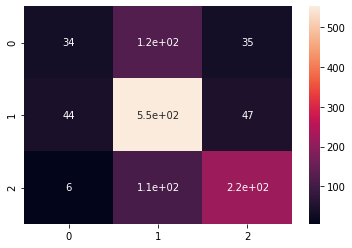

In [42]:
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
acc4 = accuracy_score(y_test, y_pred)
print(acc4)

0.688622754491018


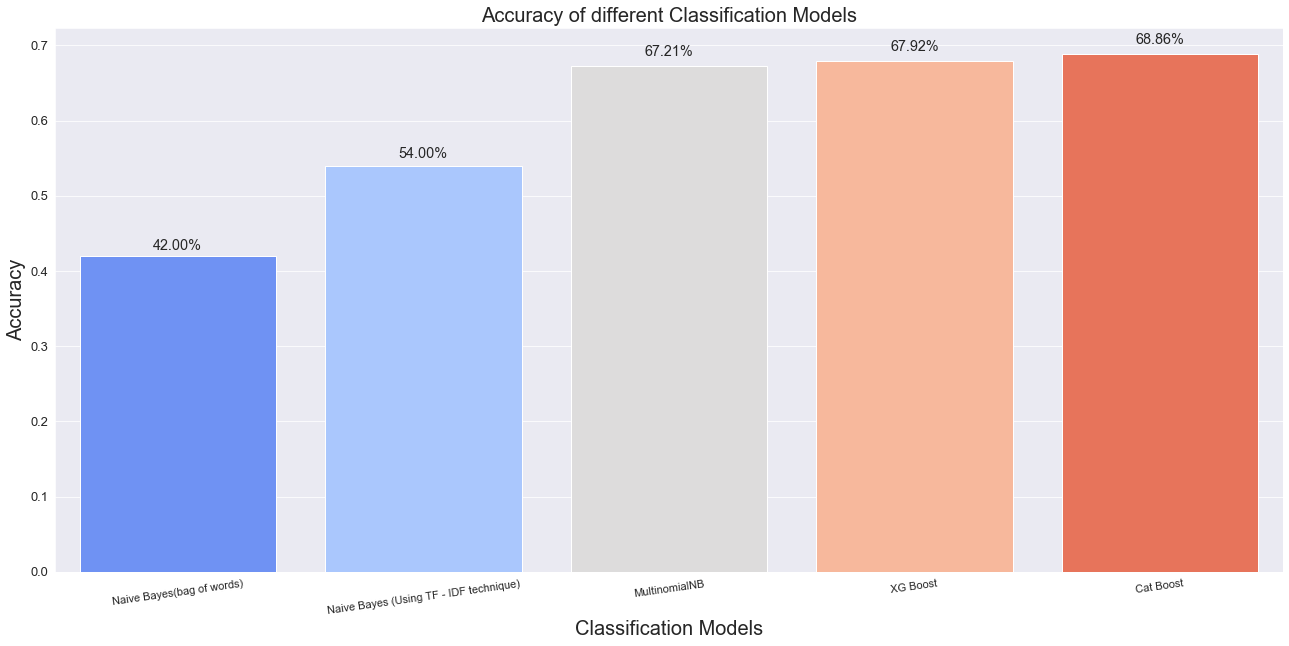

In [44]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Naive Bayes(bag of words)")
mylist.append(acc2)
mylist2.append("Naive Bayes (Using TF - IDF technique)")
mylist.append(score)
mylist2.append("MultinomialNB")
mylist.append(acc3)
mylist2.append("XG Boost")
mylist.append(acc4)
mylist2.append("Cat Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()